In [ ]:
#20個のデータをプロットする
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt(fname='figure.csv',
               delimiter=',',
               skiprows=1)

x=data[:,0:2]
t=data[:,2]

plt.plot(x[t==1,0],x[t==1,1],'o')
plt.plot(x[t==-1,0],x[t==-1,1],'^')
plt.show()

更新後のw =  [ -40.43178241 -207.75344306]
[1周目]: w = [ -40.43178241 -207.75344306]***
[2周目]: w = [ -40.43178241 -207.75344306]***
[3周目]: w = [ -40.43178241 -207.75344306]***
[4周目]: w = [ -40.43178241 -207.75344306]***
[5周目]: w = [ -40.43178241 -207.75344306]***
更新後のw =  [448.56821759 191.24655694]
[6周目]: w = [448.56821759 191.24655694]***
[7周目]: w = [448.56821759 191.24655694]***
[8周目]: w = [448.56821759 191.24655694]***
更新後のw =  [ 200.56821759 -253.75344306]
[9周目]: w = [ 200.56821759 -253.75344306]***
更新後のw =  [611.56821759  82.24655694]
[10周目]: w = [611.56821759  82.24655694]***
[11周目]: w = [611.56821759  82.24655694]***
[12周目]: w = [611.56821759  82.24655694]***
[13周目]: w = [611.56821759  82.24655694]***
更新後のw =  [ 197.56821759 -365.75344306]
[14周目]: w = [ 197.56821759 -365.75344306]***
更新後のw =  [615.56821759 -50.75344306]
[15周目]: w = [615.56821759 -50.75344306]***
[16周目]: w = [615.56821759 -50.75344306]***
[17周目]: w = [615.56821759 -50.75344306]***
更新後のw =  [ 221.56821759 -481.7534430

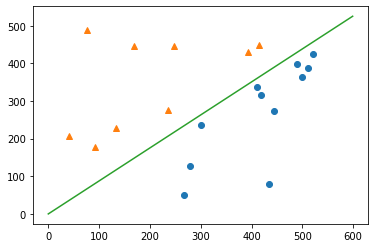

In [5]:
#パーセプトロンの実装
import numpy as np
import matplotlib.pyplot as plt

def classify(x,w):
    '''
    分類関数
    
    パラメータ
        x : x1,x2の行列
        w : w1,w2の行列
    '''
    if np.dot(w,x)>=0:
        return 1
    else:
        return -1
    
def learn_weights(x,t):
    '''
    更新式で重みを学習する
    
    パラメータ
        x : x1,x2の行列
        t : -1 or 1の値
    '''
    w=np.random.rand(2)#重みの初期化
    loop=5#繰り返し回数
    count=0#繰り返し回数をカウントする変数の初期化
    
    for i in range(loop):
        for element_x,element_t in zip(x,t):
            if classify(element_x,w)!=element_t:
                w=w+element_t*element_x
                print('更新後のw = ',w)
            count+=1
            print('[{}周目]: w = {}***'.format(count,w))
            
    return w
    
###実行ブロック###
if __name__=='__main__':
    data=np.loadtxt(fname='figure.csv',
               delimiter=',',
               skiprows=1)

    x=data[:,0:2]
    t=data[:,2]

w=learn_weights(x,t)
x1=np.arange(0,600)
plt.plot(x[t==1,0],x[t==1,1],'o')
plt.plot(x[t==-1,0],x[t==-1,1],'^')
plt.plot(x1,-w[0]/w[1]*x1,linestyle='solid')

plt.show()

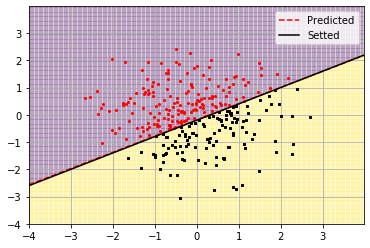

w= [ -2.           6.36812819 -10.71293358]


In [4]:
#300個の人工データを生成して分類する
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib
import random

def separatrix(x,y):
    '''
    データx１,x2の座標を区分する直線の式
    '''
    return 3*x-5*y-1

def convert(x1,x2):
    '''
    データx１，x２をバイアス項を加えたベクトルにする
    '''
    x0=np.ones(x1.shape)
    return np.array([x0,x1,x2])

def classify(x,w):
    '''
    分類関数
    
    パラメータ
        x : x1,x2の行列
        w : w1,w2の行列
    '''
    if np.dot(w,x)>=0:
        return 1
    else:
        return -1
    
def learn_3weights(X,T,N):
    '''
    更新式で重みを学習する
    
    パラメータ
        X : x1,x2の行列
        T : ラベル（-1 or 1の値）
        N : データの個数
    '''
    w=np.zeros(3)#重みを初期化
    while True:
        lst=list(range(N))#0からN-1までの配列をつくる
        random.shuffle(lst)#配列をランダムに並べ替える
        misses=0#予測を外した回数をカウントする変数を初期化

        for n in lst:#並べ替えたリストから順番に取り出す
            x_1,x_2=X[n,:]#行列Xのn行目の値をx_1,x_2に代入
            t_n=T[n]#行列Tのn行目の値をt_nに代入

            #分類関数で分類する
            predict=classify(convert(x_1,x_2),w)

            #分類関数の結果が不正解なら重みを更新する
            if predict!=t_n:
                w+=t_n*convert(x_1,x_2)
                misses+=1#予測を外した回数を増やす
            
        #不正解がなくなったら学習終了
        if misses==0:
            break

    return w

###実行ブロック###
if __name__=='__main__':
    num=300#データの個数
    np.random.seed(0)#データの乱数列を固定する
    X=np.random.randn(num,2)#ランダムなN*2の行列を生成
    
    #区分線よりも上にある点にはラベルとして１、下にある点には−１を振る
    T=np.array([1 if separatrix(x1,x2)>0 else -1 for x1,x2 in X])
    
    #重みを学習する
    w=learn_3weights(X,T,num)
    
    #格子表示用に-4から４までの等差数列を作成
    prog=np.arange(-4,4,0.03)
    
    #等差数列をｘ，ｙの値にして格子座標を生成
    xlist,ylist=np.meshgrid(prog,prog)
    
    #xlist,ylistのデータ点に更新後の重みを適用し、配列で取得
    #グラフ表示用に格子点それぞれを分類関数で分類している
    predict=[np.sign(np.dot(w,convert(x1,x2))) for x1,x2 in zip(xlist,ylist)]
    
    #学習結果で２次元の平面を色分けする
    plt.pcolormesh(xlist,
                   ylist,
                   predict,#重み適用後の−１or1をカラー値にする
                   alpha=0.1#透明度０から１
                  )
    
    plt.plot(X[T==1,0],
             X[T==1,1],
             's',
             color='black',
             markersize=2
            )
    
    plt.plot(X[T==-1,0],
             X[T==-1,1],
             'o',
             color='red',
             markersize=2
            )
    
    plt.plot(prog,-(w[0]+w[1]*prog)/w[2],color='red',linestyle='--',label='Predicted')#予測した区分線をプロット
    plt.plot(prog,(3*prog-1)/5,color='black',linestyle='solid',label='Setted')#あらかじめ設定した区分線をプロット
    
    plt.grid(True)
    plt.legend()
    plt.show()

    print('w=',w)